In [2]:
import pandas as pd
import numpy as np

CCTV_seoul = pd.read_csv("/content/drive/MyDrive/data/DataScience-master/DataScience-master/data/01. CCTV_in_Seoul.csv")
CCTV_seoul["최근증가율"] = (CCTV_seoul['2016년']+CCTV_seoul['2015년']+CCTV_seoul['2014년'])/CCTV_seoul['2013년도 이전'] * 100
CCTV_seoul.rename(columns={CCTV_seoul.columns[0]:"구별"}, inplace=True)

Popular_seoul = pd.read_excel("/content/drive/MyDrive/data/DataScience-master/DataScience-master/data/01. population_in_Seoul.xls",
                              header=2, usecols="B, D, G, J, N")

Popular_seoul.rename(columns={Popular_seoul.columns[0]:"구별",
                              Popular_seoul.columns[1]:"인구수",
                              Popular_seoul.columns[2]:"한국인",
                              Popular_seoul.columns[3]:"외국인",
                              Popular_seoul.columns[4]:"고령자"}, inplace=True)
Popular_seoul.drop([26],inplace=True)
Popular_seoul['외국인비율'] = Popular_seoul['외국인']/Popular_seoul['인구수']*100
Popular_seoul['고령자비율'] = Popular_seoul['고령자']/Popular_seoul['인구수']*100
Popular_seoul.drop(0, inplace=True)

result = pd.merge(CCTV_seoul,Popular_seoul, on="구별")
result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [3]:
del result['2013년도 이전']
del result['2014년']
del result['2015년']
del result['2016년']
result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [4]:
result.set_index('구별',inplace=True)
result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [5]:
np.corrcoef(result['고령자비율'],result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [6]:
np.corrcoef(result['외국인비율'],result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [7]:
np.corrcoef(result['인구수'],result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [8]:
result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [9]:
result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

^C
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


<function matplotlib.pyplot.show>

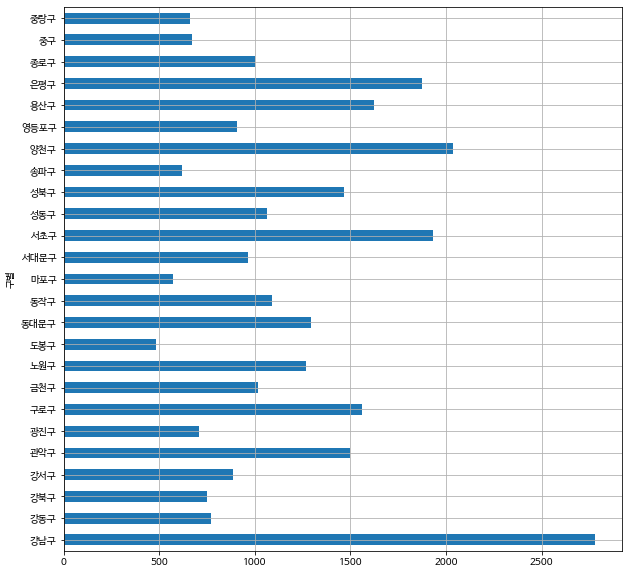

In [11]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

result['소계'].plot(kind='barh',grid=True,figsize=(10,10))
plt.show

<function matplotlib.pyplot.show>

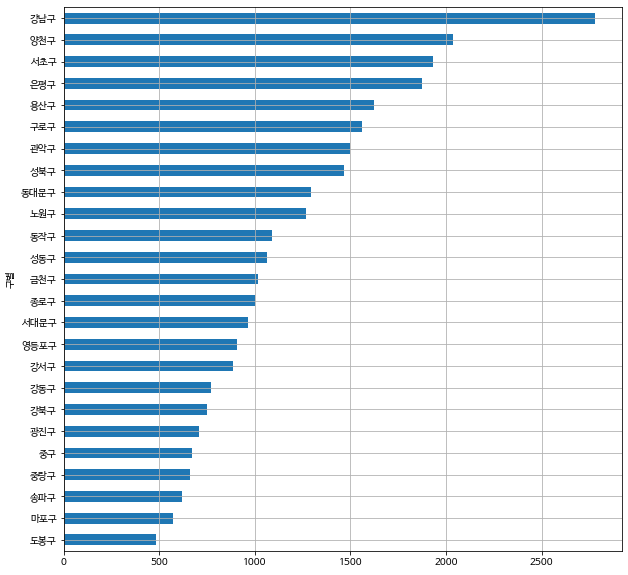

In [12]:
result['소계'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show

[]

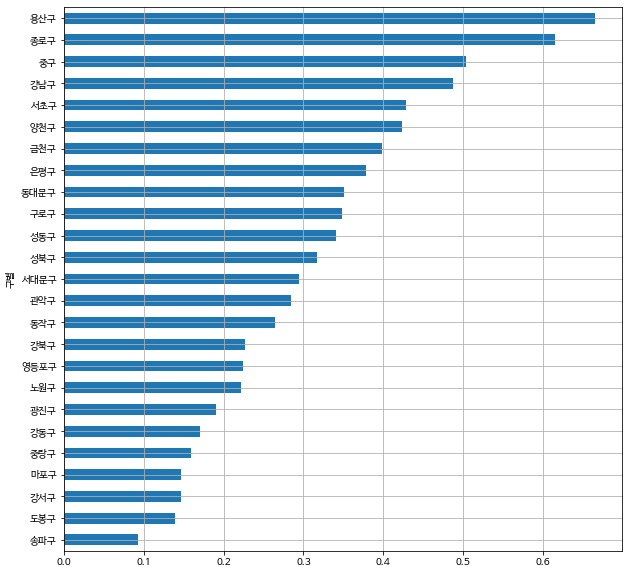

In [13]:
result['CCTV비율'] = result['소계'] / result['인구수'] * 100
result['CCTV비율'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.plot()

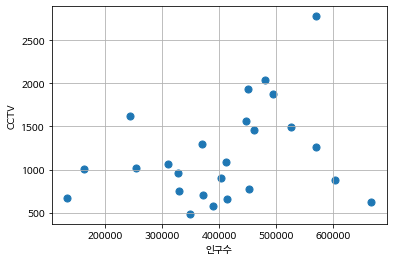

In [14]:
plt.scatter(result['인구수'],result["소계"],s=50)
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.show()

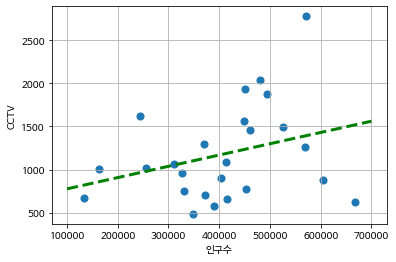

In [17]:
fp = np.polyfit(result['인구수'],result['소계'],1)
f1 = np.poly1d(fp)
fx = np.linspace(100000,700000,100)
plt.scatter(result['인구수'],result["소계"],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.show()